In [1]:
import numpy as np
import gym
import random

In [2]:
env = gym.make("FrozenLake-v0")

In [3]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.001

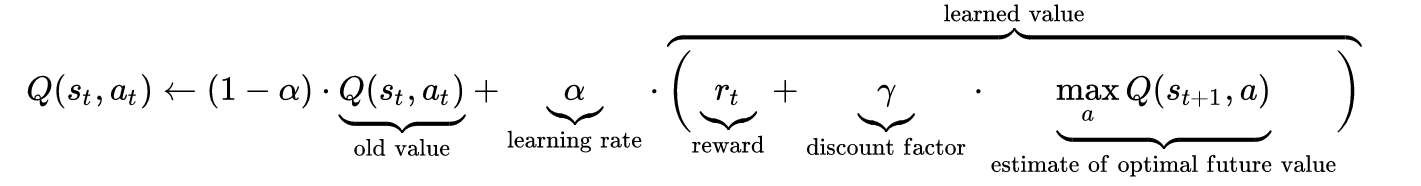

In [5]:
from IPython.display import Image
Image("q_table.png")

In [6]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    reward_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
        
        #Take Action
        new_state, reward, done, info = env.step(action)
        
        #Update Q-table
        q_table[state, action] = q_table[state, action] * (1-learning_rate) + learning_rate * (reward + discount_rate*np.max(q_table[new_state, :]))
        
        state = new_state
        reward_current_episode += reward
        
        if done == True:
            break

    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(reward_current_episode)

In [7]:
reward_per_1000_ep = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000
print("------------------------Average reward per 1000 episodes------------------------------")
for r in reward_per_1000_ep:
    print(count, ":", str(sum(r/1000)))
    count += 1000

------------------------Average reward per 1000 episodes------------------------------
1000 : 0.048000000000000036
2000 : 0.23300000000000018
3000 : 0.4000000000000003
4000 : 0.5980000000000004
5000 : 0.6600000000000005
6000 : 0.7050000000000005
7000 : 0.7390000000000005
8000 : 0.7440000000000005
9000 : 0.7320000000000005
10000 : 0.7260000000000005


In [8]:
print(q_table)

[[0.59249072 0.48457389 0.48525728 0.49916591]
 [0.41545563 0.39787671 0.27453837 0.51841083]
 [0.40717723 0.36210439 0.41199858 0.4763976 ]
 [0.29899308 0.23450891 0.36671851 0.45292119]
 [0.60785813 0.44094176 0.39442189 0.49265358]
 [0.         0.         0.         0.        ]
 [0.34813544 0.11069478 0.16304557 0.08206159]
 [0.         0.         0.         0.        ]
 [0.44261131 0.45686681 0.28554424 0.64764851]
 [0.4998393  0.71137926 0.45419392 0.38859442]
 [0.66364613 0.35236146 0.3662371  0.28718226]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.48172433 0.40596012 0.82238531 0.48113122]
 [0.70206585 0.89748119 0.71709036 0.70450552]
 [0.         0.         0.         0.        ]]
